Problem statement

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.


Load libraries

In [64]:
#import files
import numpy as np
import pandas as pd
import seaborn as sns

Load and read datasets

In [65]:
#Load datasets
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ins_train.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ins_test.csv")
sample_sub=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ins_sample_submission.csv")

In [66]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [67]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [68]:
sample_sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


Check for null values

In [69]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [70]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

Check response characteristics

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


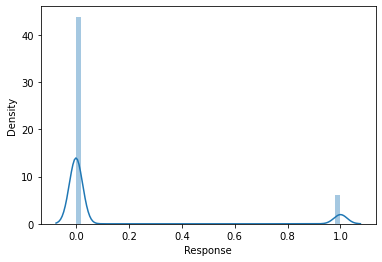

In [71]:
sns.distplot(train['Response']);

In [72]:
import collections
from collections import Counter

counter = Counter(train.Response)
for k,v in counter.items():
	per = v / len(train.Response) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=46710, Percentage=12.256%
Class=0, Count=334399, Percentage=87.744%


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Convert objects to integers

In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.Gender = le.fit_transform(train.Gender)
train.Vehicle_Age = le.fit_transform(train.Vehicle_Age)
train.Vehicle_Damage = le.fit_transform(train.Vehicle_Damage)

test.Gender = le.fit_transform(test.Gender)
test.Vehicle_Age = le.fit_transform(test.Vehicle_Age)
test.Vehicle_Damage = le.fit_transform(test.Vehicle_Damage)

Define X, y and X_test

In [75]:
#define x, y and x_test
y = train.Response
X = train.drop(['Response', 'id'], axis = 1)
X_test = test.drop(['id'], axis = 1)
X.shape, y.shape, X_test.shape

((381109, 10), (381109,), (127037, 10))

Split training set for training and testing

In [76]:
# Split into validation and training data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((342998, 10), (38111, 10), (342998,), (38111,))

Count values in validation set

In [77]:
from collections import Counter

print(Counter(y_val))

Counter({0: 33440, 1: 4671})


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


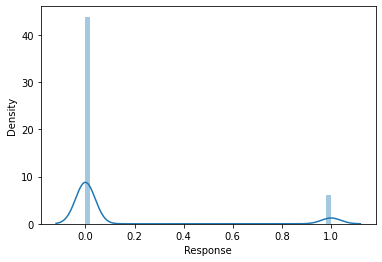

In [78]:
sns.distplot(y_val)

Class weights

In [79]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))) 

Define model

XGB Classifier

In [80]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model= XGBClassifier()
name='XGB'

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

XGB: 0.877434 (0.000012)


In [82]:
# Make predictions on validation dataset
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

model = XGBClassifier(learning_rate=1, n_estimators=2000, max_depth=40, min_child_weight=40, 
                      gamma=0.4,nthread=10, subsample=0.8, colsample_bytree=.8, 
                      objective= 'binary:logistic',scale_pos_weight=10,seed=29, class_weight=class_weights)
model.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, model.predict(X_train))
print(auc(false_positive_rate, true_positive_rate))

0.9995115613754698


In [85]:
#make predictions
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.8212327149641836


In [86]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
120399,0,0
254755,0,0
368743,0,0
151253,0,0
273720,0,0
...,...,...
105138,0,0
97675,0,0
37631,0,0
373074,0,0


In [87]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[29749,  3691],
       [ 3122,  1549]])

In [88]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.8212327149641836
Precision: 0.2956106870229008
Recall: 0.3316206379790195


In [89]:
print(Counter(y_pred))

Counter({0: 32871, 1: 5240})


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


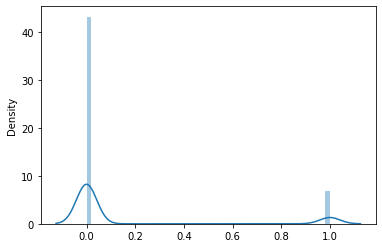

In [90]:
sns.distplot(y_pred)

Predict on test set

In [91]:
#make predictions
pred=model.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


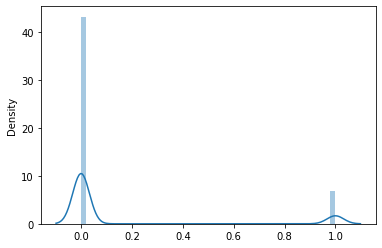

In [92]:
sns.distplot(pred)

In [93]:
print(Counter(pred))

Counter({0: 109578, 1: 17459})


Predict probability on test set

In [94]:
probability = model.predict_proba(X_test)[:,1]
probability

array([1.9859396e-08, 9.7877878e-01, 6.6391653e-03, ..., 8.0432777e-08,
       6.2994865e-10, 6.3638275e-11], dtype=float32)

Prepare submission

In [95]:
final_result = pd.DataFrame({'id': test.id, 'Response': probability})
final_result

,id,Response
0,381110,1.985940e-08
1,381111,9.787788e-01
2,381112,6.639165e-03
3,381113,1.027696e-04
4,381114,3.228481e-09
...,...,...
127032,508142,1.080035e-06
127033,508143,3.012639e-01
127034,508144,8.043278e-08
127035,508145,6.299486e-10


In [96]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [97]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,id,Response
0,381110,1.985940e-08
1,381111,9.787788e-01
2,381112,6.639165e-03
3,381113,1.027696e-04
4,381114,3.228481e-09
...,...,...
127032,508142,1.080035e-06
127033,508143,3.012639e-01
127034,508144,8.043278e-08
127035,508145,6.299486e-10
